In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [3]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

2024-09-13 20:34:11.967531: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/martin/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorFlow version:  2.17.0


In [4]:
import tensorboard
tensorboard.__version__

'2.17.1'

In [5]:
import numpy as np
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer

# Sample data
data = np.array([[i, i + 1] for i in range(100)])  # 100 time steps with 2 features
X = data[:-1]  # All but the last
y = data[1:, 0]  # Predict the first feature of the next time step

# Reshape data for Transformer: (samples, time steps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Define a simple Transformer model
class SimpleTransformer(tf.keras.Model):
    def __init__(self, num_heads, d_model):
        super(SimpleTransformer, self).__init__()
        self.attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.dense = tf.keras.layers.Dense(1)

    def call(self, x):
        attn_output = self.attention(x, x)
        return self.dense(attn_output)

# Build and compile the model
model = SimpleTransformer(num_heads=2, d_model=2)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=200, verbose=0)

# Make predictions
predictions = model.predict(X)
print(predictions)

/home/martin/miniconda3/envs/jupyter/lib/python3.9/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


/home/martin/miniconda3/envs/jupyter/lib/python3.9/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


[[[ 2.984817 ]]

 [[ 3.7314997]]

 [[ 4.4781814]]

 [[ 5.224864 ]]

 [[ 5.9715466]]

 [[ 6.718228 ]]

 [[ 7.464911 ]]

 [[ 8.211593 ]]

 [[ 8.958276 ]]

 [[ 9.704958 ]]

 [[10.45164  ]]

 [[11.198324 ]]

 [[11.945004 ]]

 [[12.6916895]]

 [[13.438368 ]]

 [[14.185052 ]]

 [[14.931733 ]]

 [[15.678414 ]]

 [[16.425098 ]]

 [[17.17178  ]]

 [[17.918463 ]]

 [[18.665146 ]]

 [[19.411827 ]]

 [[20.15851  ]]

 [[20.905193 ]]

 [[21.651875 ]]

 [[22.398554 ]]

 [[23.145243 ]]

 [[23.891922 ]]

 [[24.638603 ]]

 [[25.385286 ]]

 [[26.13197  ]]

 [[26.878647 ]]

 [[27.625334 ]]

 [[28.372013 ]]

 [[29.118698 ]]

 [[29.865376 ]]

 [[30.61206  ]]

 [[31.358744 ]]

 [[32.105427 ]]

 [[32.852108 ]]

 [[33.59879  ]]

 [[34.345474 ]]

 [[35.092155 ]]

 [[35.83884  ]]

 [[36.58552  ]]

 [[37.332207 ]]

 [[38.078888 ]]

 [[38.82557  ]]

 [[39.572254 ]]

 [[40.318935 ]]

 [[41.065613 ]]

 [[41.812294 ]]

 [[42.558983 ]]

 [[43.305664 ]]

 [[44.052338 ]]

 [[44.799034 ]]

 [[45.54571  ]]

 [[46.29239  ]

In [6]:
model.predict(np.array([[70.0, 71.0]]).reshape(1, 1, 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


/home/martin/miniconda3/envs/jupyter/lib/python3.9/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (1, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


array([[[55.25258]]], dtype=float32)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


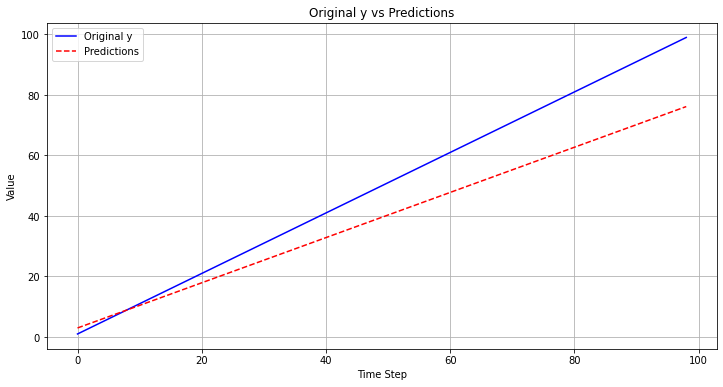

In [7]:
import matplotlib.pyplot as plt

# Make predictions
predictions = model.predict(X)

# Reshape predictions to match the shape of y
predictions = predictions.reshape(-1)  # Flatten the predictions to 1D

# Plot original data and predictions
plt.figure(figsize=(12, 6))

# Plot original y values
plt.plot(y, label='Original y', color='blue')

# Plot predictions
plt.plot(predictions, label='Predictions', color='red', linestyle='--')

# Adding labels and title
plt.title('Original y vs Predictions')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [ ]:
%tensorboard --logdir logs

Launching TensorBoard...